In [1]:
import os, sys, json, pandas
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

filepath = os.path.join(sys.path[0], "docs", "rooms.json")
with open(filepath) as f:
    data = json.load(f)

In [2]:
# Export lunch time schedule
today = datetime.today().strftime("%d.%m.%Y")
events = {}
# Go though each event and count courses
for room_events in data["events_by_date"][today].values():
    for event in room_events:
        end = datetime.strptime(event["end"], "%Y-%m-%dT%H:%M:%SZ")
        if end.hour >= 11 and end.hour < 14:
            for time in [end, end + timedelta(minutes=15)]:
                time_str = time.strftime("%H:%M")
                if events.get(time_str, None):
                    events[time_str] += 1
                else:
                    events[time_str] = 1
# Build sorted events list
events = sorted(list(events.items()), key=lambda e: e[0])
values = [v for _, v in events]

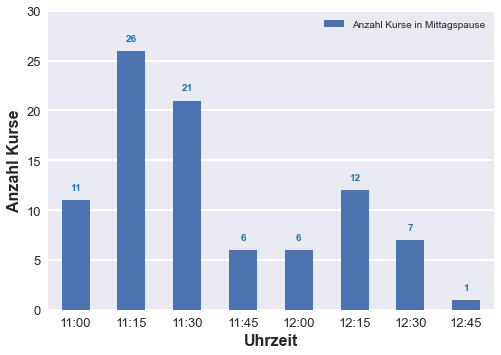

In [3]:

# Create plot
frame = pandas.DataFrame(events, columns=["Uhrzeit", "Anzahl Kurse in Mittagspause"]).set_index("Uhrzeit")
# Style plot
plt.style.use('seaborn')
plot = frame.plot(kind="bar", rot=0)
plot.set_ylabel("Anzahl Kurse", fontsize=16, fontweight='bold')
plot.set_xlabel("Uhrzeit", fontsize=16, fontweight='bold')
plot.yaxis.grid(True, which='major', linestyle='-', linewidth=2)
plot.xaxis.grid(False)
plot.legend(fontsize="medium")
plot.set_ylim(top=max(values) + 4)
plot.tick_params(axis='both', which='major', labelsize=13)
# Add bar values
for i, v in enumerate(values):
    plot.text(i, v + 1, str(v), color='tab:blue', fontweight='bold', ha='center')



In [4]:
# Export plot
plot.get_figure().savefig("test.png", bbox_inches='tight', dpi=200)